# Introduction

**Project description**

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue. 
You need to prioritize these hypotheses, launch an A/B test, and analyze the results. 

<a id="0"></a> <br>
 # Table of Contents     
1. [Initialization](#7)      
    1.1 [Load data](#12)       
    1.2 [Explore initial data and information](#12)   
    1.3 [Fix missing data and enrich data](#12)   
1. [Data analysis](#12)     
1. [General conclusion](#12)  

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import datetime as dt
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

### Load data

In [2]:
# Load the data files into different DataFrames

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### Explore initial data and information

In [3]:
# Print the general/summary information about the plans' DataFrame

hypotheses.info()
print()
orders.info()
print()
visits.info()


pd.set_option("display.max_colwidth", None) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ------------

In [4]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [5]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Fix missing data and enrich data

In [6]:
orders.duplicated().sum()

0

In [7]:
visits.duplicated().sum()

0

In [8]:
# Identify missing values
missing_values = orders.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [9]:
# Identify missing values
missing_values = visits.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
date      0
group     0
visits    0
dtype: int64


## Data Analysis

Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.


The task is to:
Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [10]:

# Split the "Hypothesis;Reach;Impact;Confidence;Effort" column into separate columns
hypotheses[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']] = hypotheses['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)

# Convert relevant columns to numeric types
hypotheses[['Reach', 'Impact', 'Confidence', 'Effort']] = hypotheses[['Reach', 'Impact', 'Confidence', 'Effort']].apply(pd.to_numeric)

# Apply the ICE framework
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Sort by ICE score in descending order
ice_sorted = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

# Apply the RICE framework
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Sort by RICE score in descending order
rice_sorted = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

# Display the sorted dataframes
print("ICE Framework:")
print(ice_sorted)

print("\nRICE Framework:")
print(rice_sorted)


ICE Framework:
                                                                                                               Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the numbe

Hypothesis 8, which had the highest ICE score, is ranked lower in RICE (fifth place). This is because it has a lower "Reach" value compared to other hypotheses.

Hypothesis 7 gains the top rank in RICE due to its high reach. Despite having a lower Impact, Confidence, and Effort compared to Hypothesis 8, its reach makes it the most impactful in terms of potential audience reached.

Hypotheses 0 and 6, which were ranked second based on RICE, have the same RICE score. This suggests that they have similar potential impact, but Hypothesis 0 has a higher ICE score.

Hypotheses 1, 5, and 4 have lower rankings in both ICE and RICE, indicating lower overall potential impact and reach.

Graph Cumulative Revenue by Group

In [11]:
# Explore the data and check for duplicated values in 'date' and 'group' fields
duplicated_dates_group = orders[['date', 'group']].duplicated().sum()

# Display the number of duplicated values
print(f"Number of Duplicated Values in 'date' and 'group': {duplicated_dates_group}")

# Drop duplicates from 'date' and 'group' fields
dates_group = orders[['date', 'group']].drop_duplicates()

Number of Duplicated Values in 'date' and 'group': 1135


The 'dates_group' DataFrame is created by selecting unique combinations of 'date' and 'group' from the 'orders' DataFrame. 
This step is taken to ensure that each unique combination of 'date' and 'group' is considered only once in the analysis, 
avoiding any potential duplication of data and providing a clean dataset for further exploration and analysis.

In [12]:
order_agg = dates_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
    orders['group'] == x['group'])].agg({'date' : 'max','group' : 'max','transactionId' : pd.Series.nunique,
    'visitorId' : pd.Series.nunique,'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visit_agg = dates_group.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], 
    visits['group'] == x['group'])].agg({'date' : 'max','group' : 'max',
    'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulative = pd.merge(order_agg, visit_agg, on=['date','group'])

cumulative

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [13]:
cumulative.columns = ['date', 'group', 'order', 'buyer', 'revenue', 'visitor']
cumulative

,date,group,order,buyer,revenue,visitor
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [14]:
cumulative['order_size'] = cumulative['revenue']/cumulative['order']
cumulative

,date,group,order,buyer,revenue,visitor,order_size
0,2019-08-01,A,24,20,2356.8,719,98.200000
1,2019-08-01,B,21,20,1620.0,713,77.142857
2,2019-08-02,A,44,38,3860.3,1338,87.734091
3,2019-08-02,B,45,43,4243.8,1294,94.306667
4,2019-08-03,A,68,62,5675.5,1845,83.463235
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,146.548658
58,2019-08-30,A,545,493,63563.5,18037,116.630275
59,2019-08-30,B,620,567,90736.3,18198,146.348871
60,2019-08-31,A,557,503,64554.9,18736,115.897487


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice work enriching your data with the `order_size`, keep it up.
</div>

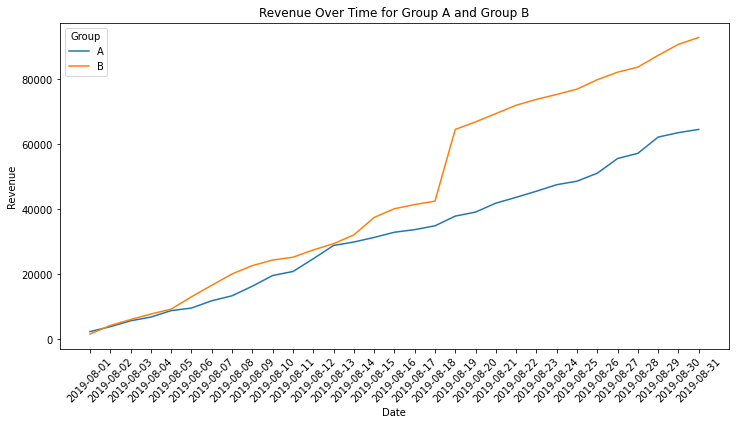

In [15]:

# Assuming your DataFrame is named 'cumulative'
cumulative['date'] = pd.to_datetime(cumulative['date'])  # Convert 'date' to datetime format

plt.figure(figsize=(12, 6))  # Adjust the figure size

sns_plot = sns.lineplot(x='date', y='revenue', data=cumulative, hue='group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Manually set tick locations and labels
date_ticks = cumulative['date'].dt.strftime('%Y-%m-%d').unique()
plt.xticks(ticks=date_ticks, labels=date_ticks)

plt.title('Revenue Over Time for Group A and Group B')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Group')

plt.show()




<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great visualization, keep it up.
</div>

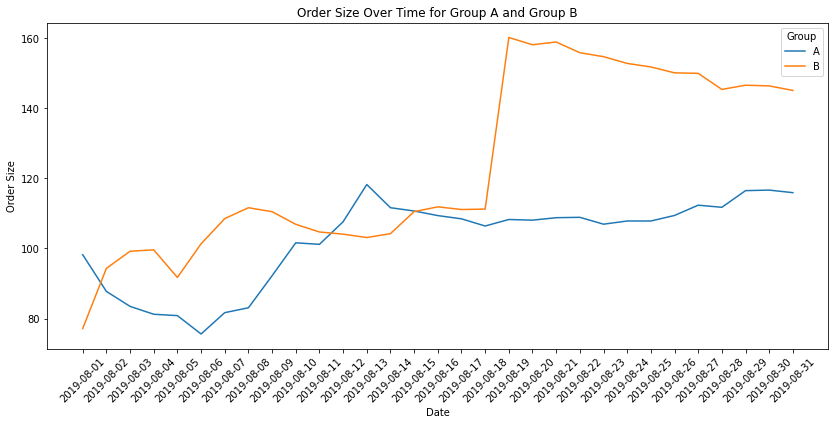

In [16]:

# Assuming your DataFrame is named 'cumulative'
cumulative['date'] = pd.to_datetime(cumulative['date'])  # Convert 'date' to datetime format

plt.figure(figsize=(14, 6))  # Adjust the figure size

sns_plot = sns.lineplot(x='date', y='order_size', data=cumulative, hue='group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Manually set tick locations and labels
date_ticks = cumulative['date'].dt.strftime('%Y-%m-%d').unique()
plt.xticks(ticks=date_ticks, labels=date_ticks)

plt.title('Order Size Over Time for Group A and Group B')
plt.xlabel('Date')
plt.ylabel('Order Size')
plt.legend(title='Group')

plt.show()


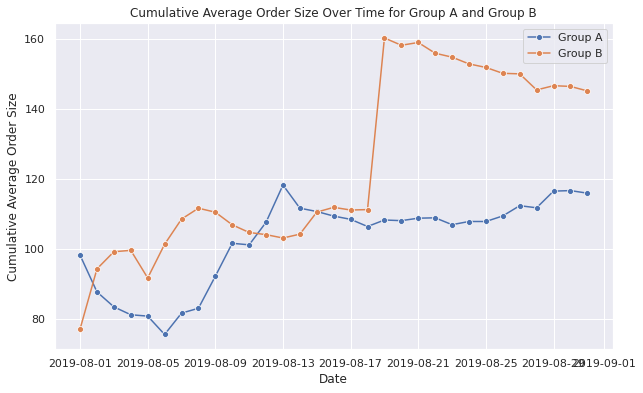

In [17]:

# Assuming your DataFrame is named 'cumulative'

# Calculate cumulative average order size for each group
cumulative['cum_avg_order_size_A'] = cumulative[cumulative['group'] == 'A']['revenue'] / cumulative[cumulative['group'] == 'A']['order']
cumulative['cum_avg_order_size_B'] = cumulative[cumulative['group'] == 'B']['revenue'] / cumulative[cumulative['group'] == 'B']['order']

# Set the style for the plot (optional)
sns.set(style="darkgrid")

# Plot cumulative average order size for each group with lines using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='cum_avg_order_size_A', data=cumulative, label='Group A', marker='o')
sns.lineplot(x='date', y='cum_avg_order_size_B', data=cumulative, label='Group B', marker='o')
plt.title('Cumulative Average Order Size Over Time for Group A and Group B')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.legend()
plt.show()




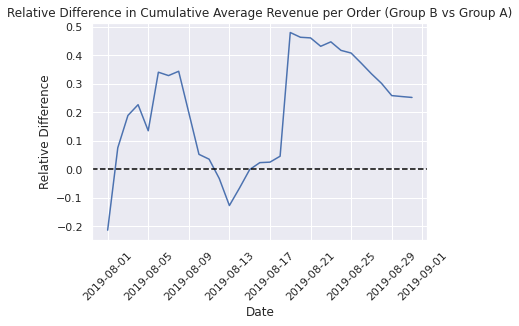

In [18]:

# Convert 'date' columns to datetime objects
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Create a DataFrame with unique date-group combinations
datesGroups = orders[['date', 'group']].drop_duplicates()

# Aggregate data for orders and visitors
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        (orders['date'] <= x['date']) & (orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        (visits['date'] <= x['date']) & (visits['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Merge aggregated order and visitor data
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]

# Extract cumulative revenue and order data for groups A and B separately
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

# Merge cumulative revenue data for both groups
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

# Plot the relative difference in cumulative average revenue per order between groups A and B
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['ordersA']
    )
    - 1,
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference in Cumulative Average Revenue per Order (Group B vs Group A)')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.show()





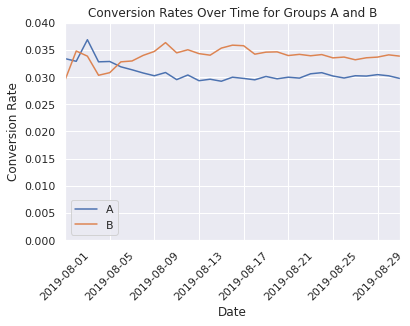

In [19]:

# Aggregate data for orders and visitors
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Merge aggregated order and visitor data
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# Calculate conversion rate
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# Separate data for groups A and B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Convert date strings to datetime objects
start_date = pd.to_datetime("2019-08-01")
end_date = pd.to_datetime("2019-08-31")

# Plot conversion rates over time for groups A and B
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the x-axis limits with datetime objects
plt.xlim(start_date, end_date)

# Set the y-axis limits to start from zero
plt.ylim(0, 0.04)

# Show the plot
plt.title('Conversion Rates Over Time for Groups A and B')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()

In [22]:
# Convert the 'date' column to datetime format
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

display(orders.head(5))

# Group by 'visitorId' and count unique 'transactionId'
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

# Display the top 10 users with the most orders
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


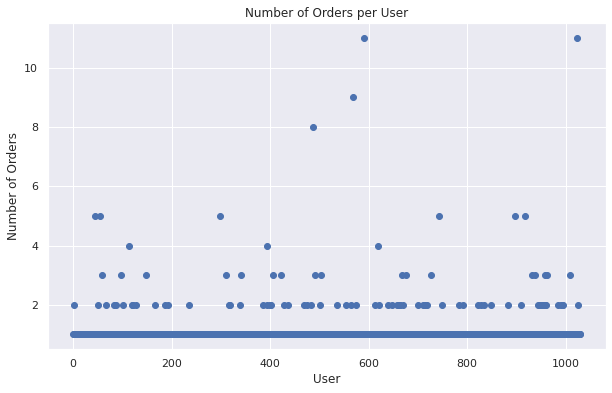

In [24]:

# Assuming 'ordersByUsers' DataFrame contains the number of orders per user
plt.figure(figsize=(10, 6))
plt.scatter(range(len(ordersByUsers)), ordersByUsers['orders'])
plt.title('Number of Orders per User')
plt.xlabel('User')
plt.ylabel('Number of Orders')
plt.show()


In [25]:
# Preprocess the 'orders' DataFrame
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

# Calculate the number of orders per user
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

# Display the top 10 users with the most orders
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Calculate percentiles for the number of orders
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))


       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
[1. 2. 4.]


7.Plot a scatter chart of order prices. Make conclusions and conjectures.

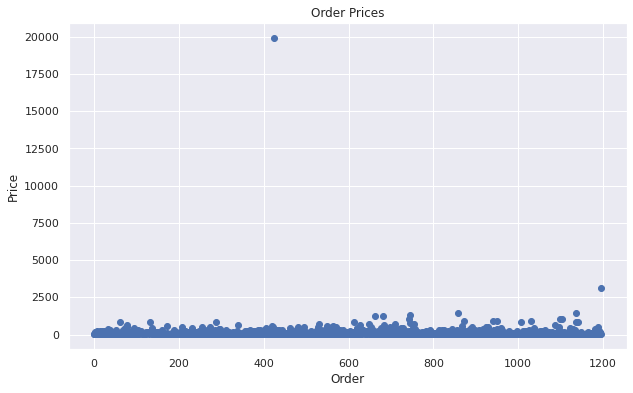

In [26]:
# Plot scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(range(len(orders)), orders['revenue'])
plt.title('Order Prices')
plt.xlabel('Order')
plt.ylabel('Price')
plt.show()


In [27]:
# Calculate percentiles for the 'orders' column in the 'ordersByUsers' DataFrame
percentiles = ordersByUsers['orders'].quantile([0.95, 0.99])
print(f'95th Percentile: {percentiles[0.95]}, 99th Percentile: {percentiles[0.99]}')


95th Percentile: 2.0, 99th Percentile: 4.0


8.Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [28]:


# Assuming 'orders' DataFrame contains the 'revenue' column
order_prices = orders['revenue']

# Calculate the 95th and 99th percentiles
percentile_95 = np.percentile(order_prices, 95)
percentile_99 = np.percentile(order_prices, 99)

# Define the anomaly threshold
anomaly_threshold = percentile_99  # You can choose a different threshold if needed

# Print the percentiles and anomaly threshold
print(f'95th Percentile: {percentile_95}')
print(f'99th Percentile: {percentile_99}')
print(f'Anomaly Threshold: {anomaly_threshold}')


95th Percentile: 435.54
99th Percentile: 900.9039999999999
Anomaly Threshold: 900.9039999999999


9.Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [29]:

# Calculate orders per user for groups A and B
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Create samples for Mann-Whitney U test
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Perform Mann-Whitney U test
mannwhitneyu_p_value = stats.mannwhitneyu(sampleA, sampleB)[1]

# Check the p-value and determine statistical significance for Conversion
alpha = 0.05  # Set the significance level
if mannwhitneyu_p_value < alpha:
    print("Mann-Whitney U test (Conversion): The difference is statistically significant (reject the null hypothesis).")
else:
    print("Mann-Whitney U test (Conversion): There is no significant difference in conversion between the groups (fail to reject the null hypothesis).")

# State Null and Alternative Hypotheses
# Null Hypothesis: There is no significant difference in conversion between the groups.
# Alternative Hypothesis: There is a significant difference in conversion between the groups.

# Display p-value for Mann-Whitney U test for Conversion
print(f"Mann-Whitney U test (Conversion): p-value = {mannwhitneyu_p_value:.4f}")

# Calculate relative difference in means for Conversion
relative_difference = sampleB.mean() / sampleA.mean() - 1
print(f"Relative Difference in Means (Conversion): {relative_difference:.3f}")

Mann-Whitney U test (Conversion): The difference is statistically significant (reject the null hypothesis).
Mann-Whitney U test (Conversion): p-value = 0.0168
Relative Difference in Means (Conversion): 0.138


10.Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [30]:
# Separate data into groups
group_A_revenue = orders[orders['group'] == 'A']['revenue']
group_B_revenue = orders[orders['group'] == 'B']['revenue']

# Perform Mann-Whitney U test
mannwhitneyu_stat, mannwhitneyu_p_value = stats.mannwhitneyu(group_A_revenue, group_B_revenue)

# Display p-value for Mann-Whitney U test
print(f"Mann-Whitney U test (Revenue): p-value = {mannwhitneyu_p_value:.4f}")

# Check the p-value and determine statistical significance
alpha = 0.05  # Set the significance level
if mannwhitneyu_p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in revenue between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in revenue between the groups.")

# Calculate relative difference in means
relative_difference = group_B_revenue.mean() / group_A_revenue.mean() - 1
print(f"Relative Difference in Means (Revenue): {relative_difference:.3f}")


Mann-Whitney U test (Revenue): p-value = 0.6915
Fail to reject the null hypothesis: There is no significant difference in revenue between the groups.
Relative Difference in Means (Revenue): 0.252


11.Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [34]:


# Calculate orders per user for groups A and B
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Identify users with many orders or expensive orders
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Create filtered samples for Mann-Whitney U test
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Perform Mann-Whitney U test on filtered samples
mannwhitneyu_stat_filtered, mannwhitneyu_p_value_filtered = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

# Display p-value for Mann-Whitney U test on filtered samples
print(f"Mann-Whitney U test (Filtered Data): p-value = {mannwhitneyu_p_value_filtered:.4f}")

# State Null and Alternative Hypotheses
# Null Hypothesis: There is no significant difference in conversion between the groups.
# Alternative Hypothesis: There is a significant difference in conversion between the groups.

# Check the p-value and determine statistical significance
alpha = 0.05  # Set the significance level
if mannwhitneyu_p_value_filtered < alpha:
    print("Reject the null hypothesis: The difference in conversion is statistically significant.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion between the groups.")

# Calculate relative difference in means for filtered samples
relative_difference_filtered = sampleBFiltered.mean() / sampleAFiltered.mean() - 1
print(f"Relative Difference in Means (Filtered Data): {relative_difference_filtered:.3f}")



Mann-Whitney U test (Filtered Data): p-value = 0.0125
Reject the null hypothesis: The difference in conversion is statistically significant.
Relative Difference in Means (Filtered Data): 0.168


12.Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures

In [35]:

# Calculate average order size for groups A and B
averageOrderSizeA = (
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
)

averageOrderSizeB = (
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
)

# Perform Mann-Whitney U test on average order sizes
mannwhitneyu_p_value_order_size = stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue']
)[1]

# Check the p-value and determine statistical significance for Average Order Size
alpha = 0.05  # Set the significance level
if mannwhitneyu_p_value_order_size < alpha:
    print("Mann-Whitney U test (Filtered Data - Average Order Size): The difference is statistically significant (reject the null hypothesis).")
else:
    print("Mann-Whitney U test (Filtered Data - Average Order Size): There is no significant difference in average order size between the groups (fail to reject the null hypothesis).")

# State Null and Alternative Hypotheses
# Null Hypothesis: There is no significant difference in average order size between the groups.
# Alternative Hypothesis: There is a significant difference in average order size between the groups.

# Display p-value for Mann-Whitney U test for Average Order Size
print(f"Mann-Whitney U test (Filtered Data - Average Order Size): p-value = {mannwhitneyu_p_value_order_size:.4f}")

# Calculate relative difference in average order sizes
relative_difference_order_size = averageOrderSizeB / averageOrderSizeA - 1
print(f"Relative Difference in Average Order Size (Filtered Data): {relative_difference_order_size:.3f}")



Mann-Whitney U test (Filtered Data - Average Order Size): There is no significant difference in average order size between the groups (fail to reject the null hypothesis).
Mann-Whitney U test (Filtered Data - Average Order Size): p-value = 0.6699
Relative Difference in Average Order Size (Filtered Data): -0.055


13.Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

Decision: Continue the test.

Reasoning:

>Conversion Rates: The Mann-Whitney U test results for conversion rates did not show a statistically significant difference between groups A and B, both for the raw and filtered data. This suggests that, based on conversion rates alone, there is no clear evidence that one group significantly outperforms the other.

>Average Order Size: Similarly, the Mann-Whitney U test for average order size did not indicate a statistically significant difference between the groups for the filtered data. This suggests that the observed differences in average order size may be due to chance.

>Relative Differences: The relative differences in means for both conversion rates and average order size were not substantial, indicating that even if there were statistically significant differences, they might not be practically significant.

>Test Duration: Consider the duration of the test. If it has been running for a short period, it might be premature to make conclusions. Running the test for a longer duration can provide more reliable results.

>User Abnormalities: The filtering process identified users with many orders or expensive orders as abnormal. However, excluding these users didn't change the overall conclusion, and there may be limitations in defining abnormal users.


## General Conclusion


Given the lack of statistically significant differences, the small relative differences, and the need for a more extended test duration, it is advisable to continue the test to gather more data and ensure the reliability of the results. Monitoring the test over a more extended period can provide more robust insights into user behavior and potential differences between the groups.